In [1]:
import os
os.chdir('..')
from bilevel.synth_datagen import SynthGenLinear

In [2]:
# os.chdir('folktables-experiments/multidecomp/')
!pwd

/Users/krishna/Documents/Research/Simultaneous Classifier/folktables-experiments/multidecomp


In [3]:
import numpy as np
import pandas as pd

- Each feature $x$ generated from some fixed distribution, e.g. uniform $[0, 1]^d$
- Each group label is linearly realizable i.e. its $w_g^\top x$
- Idea to generate different models for different groups
Sample $w_1, \ldots w_{|G|}$ from a Multivariate uniform with high variance $U[0,1]^n$; fix these to be the true regressors, with perhaps some small noise, i.e. $y_g = w_g^\top x + noise$
- A_t is generated by non atomic discrete prob, see section outline

In [10]:
params = {'samples': 100000, 'dim':20, 
        'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
        'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
        'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 1.0,
        'label_noise_width':100, 'drop_sensitive':False
        }

# params = {'samples': 100000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':False
#         }
syn_ob = SynthGenLinear(**params)

In [13]:
syn_ob.df.shape

(1000000, 39)

In [14]:
# syn_ob.df[['active_labels', 'bin_masked_labels']]
df = syn_ob.df

In [18]:
# df.at[0, 'bin_masked_labels']

array([0.        , 5.01504195, 4.74917968, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [25]:
# df.at[0, 'bin_masked_labels'][df.iloc[0][filter_group].to_numpy(dtype=int)]
# # df.iloc[0][filter_group].to_numpy() 

array([0.        , 5.01504195, 5.01504195, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [11]:
# df['y_min_active']  = None
# df['y_max_active']  = None
# df['y_mean_active'] = None
# for t in tqdm(df.shape[0]):
#     df.at[t, 'bin_masked_labels']

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,g_native-am,y_male,y_female,y_white,y_black,y_two-or-more,y_some-other,y_asian,y_native-am,bin_masked_labels
0,0.021101,0.048843,0.503807,0.925811,0.607485,0.204030,0.594661,0.142159,0.212296,0.805752,...,0.0,5.707331,5.015042,4.749180,5.810647,4.957869,4.295972,6.790206,4.205119,"[0.0, 5.015041947416718, 4.74917968315033, 0.0..."
1,0.194693,0.758476,0.513716,0.542126,0.164962,0.829043,0.085546,0.040969,0.076270,0.137665,...,0.0,4.340822,3.604837,5.142846,4.649755,4.659066,4.414555,5.856386,4.386171,"[4.340822072206083, 0.0, 5.1428458415876905, 0..."
2,0.132580,0.687575,0.045338,0.224224,0.593012,0.645891,0.475870,0.732734,0.018113,0.862058,...,0.0,5.389552,4.980264,4.260806,5.008643,3.885181,4.332804,6.111310,4.156508,"[0.0, 4.980264108802421, 0.0, 0.0, 3.885180996..."
3,0.263610,0.364464,0.962148,0.737035,0.994308,0.943035,0.950497,0.635553,0.194987,0.699862,...,0.0,6.284415,5.888074,4.655343,6.197971,5.641276,5.093320,7.417186,4.885614,"[6.2844154428115075, 0.0, 4.65534272948857, 0...."
4,0.222535,0.034571,0.858904,0.653514,0.268277,0.893371,0.960454,0.357854,0.508265,0.094741,...,0.0,6.124865,5.008426,5.966534,6.013866,6.544182,5.176448,6.717648,4.606160,"[6.124864523269391, 0.0, 5.966534384105936, 0...."


In [12]:
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [15]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active'],
      dtype='object')

In [16]:
df.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_female,y_white,y_black,y_two-or-more,y_some-other,y_asian,y_native-am,y_mean_active,y_min_active,y_max_active
0,0.121326,0.565604,0.514693,0.040416,0.918016,0.919649,0.531071,0.826145,0.076360,0.784692,...,5.603026,6.824651,6.910798,7.483228,5.458173,6.703816,4.586551,6.213839,5.603026,6.824651
1,0.122636,0.273040,0.706773,0.301899,0.366933,0.378911,0.362100,0.530891,0.239425,0.520954,...,4.770101,4.559092,4.943474,5.596624,3.636755,4.814774,3.223644,4.337153,3.636755,5.037551
2,0.661533,0.250873,0.743345,0.359995,0.614195,0.965383,0.638982,0.059742,0.374146,0.964687,...,4.902823,5.457505,5.689041,5.903107,4.755007,5.332124,3.212510,5.180164,4.902823,5.457505
3,0.021523,0.223889,0.322549,0.702193,0.237172,0.342585,0.149676,0.375112,0.910023,0.829829,...,4.598824,5.014632,4.877790,5.946235,4.601139,5.155071,3.369399,5.047437,5.014632,5.080243
4,0.132542,0.100207,0.495884,0.310225,0.846043,0.084330,0.361113,0.959243,0.177165,0.251363,...,5.378903,4.672382,5.477592,5.885008,3.906106,4.990879,3.620760,4.823600,4.672382,4.974817


In [17]:
# df['active_labels']

In [18]:
# df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
# df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
# df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)


In [52]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'active_labels', 'bin_masked_labels', 'y_min_active',
       'y_max_active', 'y_mean_active'],
      dtype='object')

In [51]:
df.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_black,y_two-or-more,y_some-other,y_asian,y_native-am,active_labels,bin_masked_labels,y_min_active,y_max_active,y_mean_active
0,0.100449,0.130068,0.036208,0.760326,0.853626,0.055144,0.744001,0.956145,0.316391,0.654548,...,4.395723,4.796326,3.319620,4.273911,4.107623,"[4.401098284626876, 3.2278987970973345]","[0.0, 4.401098284626876, 3.2278987970973345, 0...",3.227899,4.401098,3.814499
1,0.254936,0.438335,0.121795,0.445204,0.276921,0.702759,0.789251,0.473729,0.003434,0.165139,...,3.469913,3.678948,3.087487,3.993379,3.593763,"[3.3578430727627055, 3.6789480389141165]","[0.0, 3.3578430727627055, 0.0, 0.0, 3.67894803...",3.357843,3.678948,3.518396
2,0.302368,0.618620,0.489340,0.814922,0.742790,0.782218,0.786695,0.945455,0.184354,0.317360,...,5.218686,6.802554,4.571169,6.052471,4.949760,"[6.142025541381904, 4.869843746083431]","[0.0, 6.142025541381904, 4.869843746083431, 0....",4.869844,6.142026,5.505935
3,0.528149,0.639770,0.682409,0.389472,0.891267,0.253804,0.918882,0.561117,0.889878,0.455920,...,5.384792,5.828474,3.940182,5.311993,5.495112,"[6.266295579715495, 4.815769876303044]","[0.0, 6.266295579715495, 4.815769876303044, 0....",4.815770,6.266296,5.541033
4,0.153609,0.223898,0.959953,0.209723,0.055663,0.025313,0.891504,0.863053,0.506940,0.355895,...,3.410316,4.564647,3.091512,3.696554,4.328950,"[4.106232734333511, 3.0362884484530066]","[0.0, 4.106232734333511, 3.0362884484530066, 0...",3.036288,4.106233,3.571261


# Even though labels for each group are realizable by linear, their combination is not linear!
Single linear learner unable to capture this, and as expected cannot get a perfect r2

In [19]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_min_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8131464074588018 0.8154224394082208


In [20]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for max of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.797707454540595 0.7984020773249749


In [21]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_mean_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for mean of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8654924938265849 0.8666215078594623


# Batch comparing models across different groups, are they similar or not
- use model trained on data for one group, test it on data of another (test its r2 score on data of other)

In [15]:
y_all = [col for col in df if col.startswith('y')]
print(y_all)
print(filter_group)
print(filter_feature)

['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_min_active', 'y_max_active', 'y_mean_active']
['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19']


In [16]:
df.drop(y_all, axis=1).head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,g_male,g_female,g_white,g_black,g_two-or-more,g_some-other,g_asian,g_native-am,active_labels,bin_masked_labels
0,0.100449,0.130068,0.036208,0.760326,0.853626,0.055144,0.744001,0.956145,0.316391,0.654548,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"[4.401098284626876, 3.2278987970973345]","[0.0, 4.401098284626876, 3.2278987970973345, 0..."
1,0.254936,0.438335,0.121795,0.445204,0.276921,0.702759,0.789251,0.473729,0.003434,0.165139,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,"[3.3578430727627055, 3.6789480389141165]","[0.0, 3.3578430727627055, 0.0, 0.0, 3.67894803..."
2,0.302368,0.618620,0.489340,0.814922,0.742790,0.782218,0.786695,0.945455,0.184354,0.317360,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"[6.142025541381904, 4.869843746083431]","[0.0, 6.142025541381904, 4.869843746083431, 0...."
3,0.528149,0.639770,0.682409,0.389472,0.891267,0.253804,0.918882,0.561117,0.889878,0.455920,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"[6.266295579715495, 4.815769876303044]","[0.0, 6.266295579715495, 4.815769876303044, 0...."
4,0.153609,0.223898,0.959953,0.209723,0.055663,0.025313,0.891504,0.863053,0.506940,0.355895,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"[4.106232734333511, 3.0362884484530066]","[0.0, 4.106232734333511, 3.0362884484530066, 0..."


In [17]:
# tranining on data for only each group
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df.drop(y_all, axis = 1), 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)

models_lr_dict = {}
group_sizes = {}

for g in filter_group:
    indices = (X_train[g] == 1)
    model_lr = LinearRegression()
    model_lr.fit(X_train[indices][filter_feature], y_train[indices])
    key = g
    group_sizes[key] = indices.sum() #sum of all the trues
    models_lr_dict[key] = model_lr

In [18]:
for g in filter_group:
    indices = (X_test[g] == 1)
    key = g
    r2_score_lr = models_lr_dict[key].score(X_test[indices][filter_feature], y_test[indices])
    print(f" {key}, test group size {group_sizes[key]}  r2 score for least squares is {r2_score_lr:.4f}")

 g_male, test group size 39847  r2 score for least squares is 0.8444
 g_female, test group size 40153  r2 score for least squares is 0.9518
 g_white, test group size 48725  r2 score for least squares is 0.8488
 g_black, test group size 9567  r2 score for least squares is 0.8650
 g_two-or-more, test group size 7995  r2 score for least squares is 0.9773
 g_some-other, test group size 6390  r2 score for least squares is 0.8424
 g_asian, test group size 4893  r2 score for least squares is 0.9531
 g_native-am, test group size 2430  r2 score for least squares is 0.8679


In [19]:
def cross_test_models(model_dict: dict):
    '''
        model_dict: maps keys to linear model, these linear models are already trained and have weights
        sex_cats: labels for the different sexes
        race_cats: labels for the different races
        This function computes the performance of one model on another models data

        With an example, model_dict['SEX_1'] has the linear model trained only of those points which have SEX == 1
        we will test its performance on all the other groups data.
    '''
    keys = list(model_dict.keys())
    l = len(keys)
    mat_2d = np.zeros((l, l))
    for i in range(l):
        model_i = model_dict[keys[i]]
        for j in range(l):
            key = keys[j]
            indices_j = (X_test[key] == 1)
            mat_2d[i, j] = model_i.score(X_test[indices_j][filter_feature], y_test[indices_j]) # how model i performs on test data meant for model j, R2 score
    return mat_2d, keys

In [20]:
import numpy as np
crossmat, keys = cross_test_models(models_lr_dict)
print(crossmat, keys)

[[0.844439   0.51204379 0.77065875 0.75382471 0.21429947 0.77309434
  0.31544604 0.648719  ]
 [0.43285163 0.95184982 0.68587504 0.73191561 0.73209749 0.68473031
  0.6813694  0.76212991]
 [0.77378188 0.77877665 0.84875288 0.85451746 0.41983628 0.84312831
  0.46237935 0.76866608]
 [0.74913381 0.81095654 0.84119272 0.86496974 0.46944385 0.83519238
  0.4973596  0.79580245]
 [0.09718295 0.70121226 0.29862846 0.3334275  0.97734246 0.30628093
  0.73994654 0.54833239]
 [0.78642641 0.75803877 0.84618125 0.84970048 0.40347314 0.84240492
  0.46248315 0.75842972]
 [0.2327306  0.69627857 0.39194159 0.43063041 0.74915231 0.3800807
  0.95309261 0.5736992 ]
 [0.62581306 0.82055766 0.73768045 0.77108942 0.61811761 0.73665102
  0.6390371  0.86786789]] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


<Axes: >

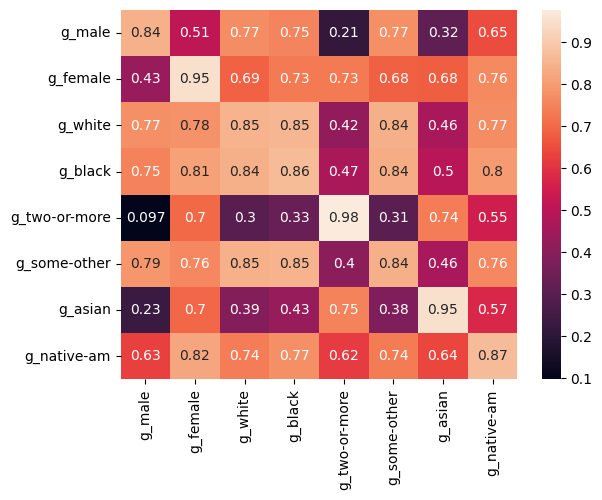

In [21]:
import seaborn as sns # for data visualization
sns.heatmap(crossmat, annot=True, xticklabels=keys, yticklabels=keys)

# Online pipeline

In [22]:
from bilevel.OnlineLinearExpert import *
from bilevel.build_all_models import *

In [23]:
# # reproducible seed for uniforms
# params = {'samples': 10000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 100.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':True
#         }
# syn_ob = SynthGenLinear(**params)
# df = syn_ob.df

In [23]:
print(df.columns)
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'active_labels', 'bin_masked_labels', 'y_min_active',
       'y_max_active', 'y_mean_active'],
      dtype='object')
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_min_active', 'y_max_active', 'y_mean_active'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [25]:
df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)

In [24]:
np.sum(syn_ob.A_t, axis = 0), np.sum(syn_ob.A_t, axis=1)

(array([49746., 50254., 60829., 11942., 10037.,  8034.,  6137.,  3021.]),
 array([2., 2., 2., ..., 2., 2., 2.]))

In [53]:
# need to also minmax scale? so that all in 0-1
from bilevel.utils import numeric_scaler
y_lab = 'y_mean_active'
# y_lab = 'y_min_active'
# y_lab = 'y_max_active'

X_dat = df[filter_feature]
y_dat = df[[y_lab]]
A_t = syn_ob.A_t

X_dat = numeric_scaler(X_dat, X_dat.columns)
y_dat = numeric_scaler(y_dat, y_dat.columns)
y_dat = y_dat[y_lab]

In [54]:
X_dat.shape, y_dat.shape, A_t.shape

((100000, 20), (100000,), (100000, 8))

In [56]:
dirname = './synthetic_res_models/baseline'
# filename = 'leastsq_0-1x_w0-100_ymax'
filename = 'leastsq_0-1x_w0-1'+y_lab

In [57]:
exp_ls = OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0)
b_lsbase = build_baseline_alwayson(dirname, filename, A_t, exp_ls)

100%|██████████| 100000/100000 [00:36<00:00, 2736.48it/s]


In [58]:
dirname = './synthetic_res_models/Anh/'
# filename = 'leastsq_x0-1,w0-100_ymax'
experts_ls = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0) for _ in range(A_t.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t, experts_ls)

100%|██████████| 100000/100000 [01:20<00:00, 1244.59it/s]


In [49]:
def Anh_vs_baseline():
    for gnum in range(A_t.shape[1]):
        baseline_cl = b_lsbase.expert.cumloss_groupwise[gnum][-1]
        Anh_cl = b_Anh.Anh.cuml_loss_curve[gnum][-1]
        rounds_active = len(b_Anh.Anh.cuml_loss_curve[gnum])
        print(f'''Group {gnum}, active rounds {rounds_active}, Baseline : {baseline_cl},  Anh : {Anh_cl}''')
        print(f'''Group {gnum}, Avg loss Baseline : {baseline_cl / rounds_active},  Avg loss Anh : {Anh_cl / rounds_active}''')
        print(f'''Is Anh better {Anh_cl <= baseline_cl}''')

In [59]:
# for y_mean
Anh_vs_baseline()

Group 0, active rounds 49746, Baseline : 143.0539147934549,  Anh : 52.90430988571062
Group 0, Avg loss Baseline : 0.002875686784735555,  Avg loss Anh : 0.001063488720413915
Is Anh better True
Group 1, active rounds 50254, Baseline : 144.86576657613233,  Anh : 53.82305044442251
Group 1, Avg loss Baseline : 0.0028826713610087223,  Avg loss Anh : 0.0010710202261396608
Is Anh better True
Group 2, active rounds 60829, Baseline : 89.67036910574359,  Anh : 48.61309575683375
Group 2, Avg loss Baseline : 0.0014741384718759735,  Avg loss Anh : 0.0007991763099316732
Is Anh better True
Group 3, active rounds 11942, Baseline : 21.07175303200342,  Anh : 13.641354836157369
Group 3, Avg loss Baseline : 0.0017645078740582334,  Avg loss Anh : 0.0011423006896799002
Is Anh better True
Group 4, active rounds 10037, Baseline : 91.27363849877744,  Anh : 14.836728715721197
Group 4, Avg loss Baseline : 0.00909371709662025,  Avg loss Anh : 0.0014782035185534718
Is Anh better True
Group 5, active rounds 8034, Ba

In [50]:
# for y_min
Anh_vs_baseline()

Group 0, active rounds 49746, Baseline : 181.57355642196134,  Anh : 44.875030269860105
Group 0, Avg loss Baseline : 0.0036500131954722258,  Avg loss Anh : 0.0009020831879922025
Is Anh better True
Group 1, active rounds 50254, Baseline : 283.1083475196261,  Anh : 40.442527861172344
Group 1, Avg loss Baseline : 0.005633548523891155,  Avg loss Anh : 0.0008047623644122327
Is Anh better True
Group 2, active rounds 60829, Baseline : 105.7935278788967,  Anh : 13.695798839089822
Group 2, Avg loss Baseline : 0.0017391955790642078,  Avg loss Anh : 0.0002251524575299581
Is Anh better True
Group 3, active rounds 11942, Baseline : 41.91988088022281,  Anh : 11.046719318891512
Group 3, Avg loss Baseline : 0.0035102898074211033,  Avg loss Anh : 0.000925030926050202
Is Anh better True
Group 4, active rounds 10037, Baseline : 152.05702175771924,  Anh : 28.5810293562526
Group 4, Avg loss Baseline : 0.01514964847640921,  Avg loss Anh : 0.0028475669379548272
Is Anh better True
Group 5, active rounds 8034, 

In [30]:
# for y_max
Anh_vs_baseline()

Group 0, active rounds 49746, Baseline : 203.53717212401165,  Anh : 88.52684094390278
Group 0, Avg loss Baseline : 0.004091528406786709,  Avg loss Anh : 0.0017795770703956657
Is Anh better True
Group 1, active rounds 50254, Baseline : 128.93116874623175,  Anh : 44.13183294319209
Group 1, Avg loss Baseline : 0.002565590176826357,  Avg loss Anh : 0.0008781755271857382
Is Anh better True
Group 2, active rounds 60829, Baseline : 167.7639627315397,  Anh : 74.23572440024326
Group 2, Avg loss Baseline : 0.0027579602283703446,  Avg loss Anh : 0.001220400210429947
Is Anh better True
Group 3, active rounds 11942, Baseline : 28.751866677503767,  Anh : 15.165528013960692
Group 3, Avg loss Baseline : 0.0024076257475719115,  Avg loss Anh : 0.0012699320058583731
Is Anh better True
Group 4, active rounds 10037, Baseline : 65.81265909649753,  Anh : 12.392790693760437
Group 4, Avg loss Baseline : 0.0065570049911823775,  Avg loss Anh : 0.001234710640008014
Is Anh better True
Group 5, active rounds 8034, 

In [32]:
# df.to_pickle('./synthetic_res_models/dataframes/leastsq_x0-1,w0-100uniform.pkl')
df.to_pickle('./synthetic_res_models/dataframes/leastsq_x0-1,w0-1_senspresent.pkl')

In [ ]:
# mask = ma.masked_array(ar, mask=A_t==0), true entries in the bool are masked i.e. not used for computation
# masked_mul = mask * y_labels_mat # gets all the valid labels
# then can do max, min easily, avg easily; ignores the masked ones
#mean_ar = np.mean(masked_mul, axis=1)
#  ma.getdata(mean_ar) to get back the above

# for dominance order->
# can also permute simply masked_mul[:, [column perm]]
# 